### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Errors

[2.9236616  2.71074115 3.02598111 2.82587734]


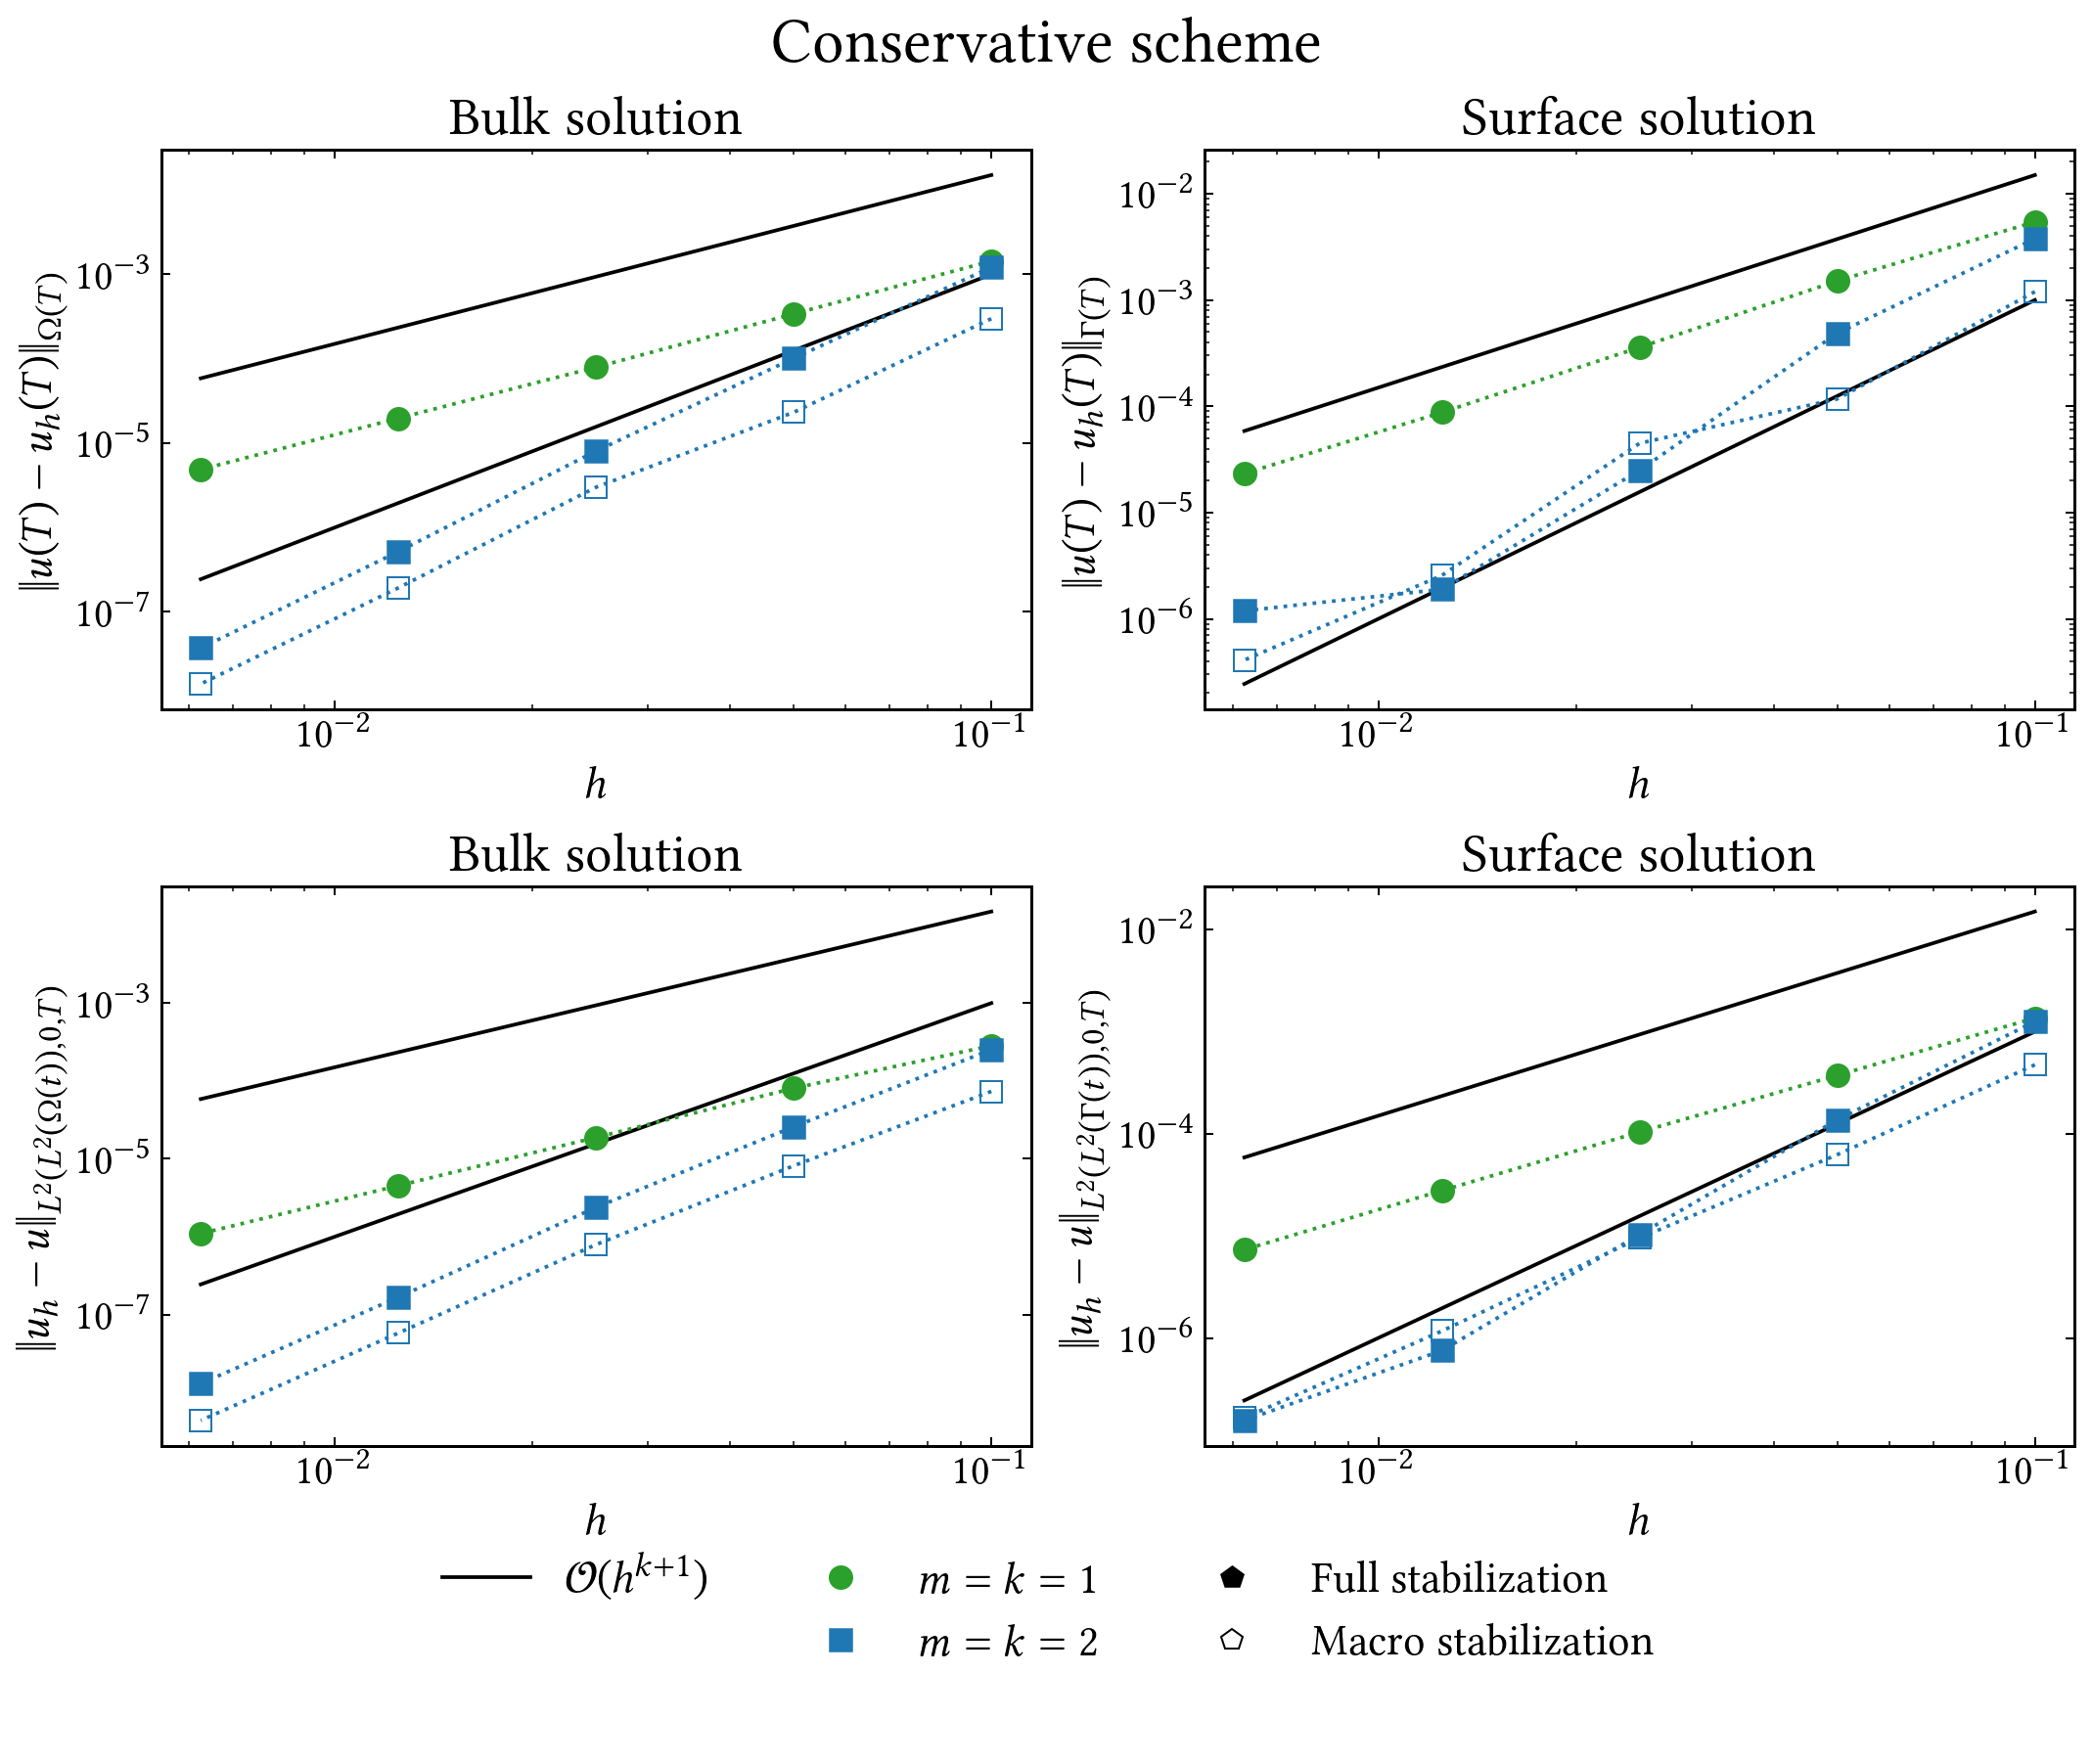

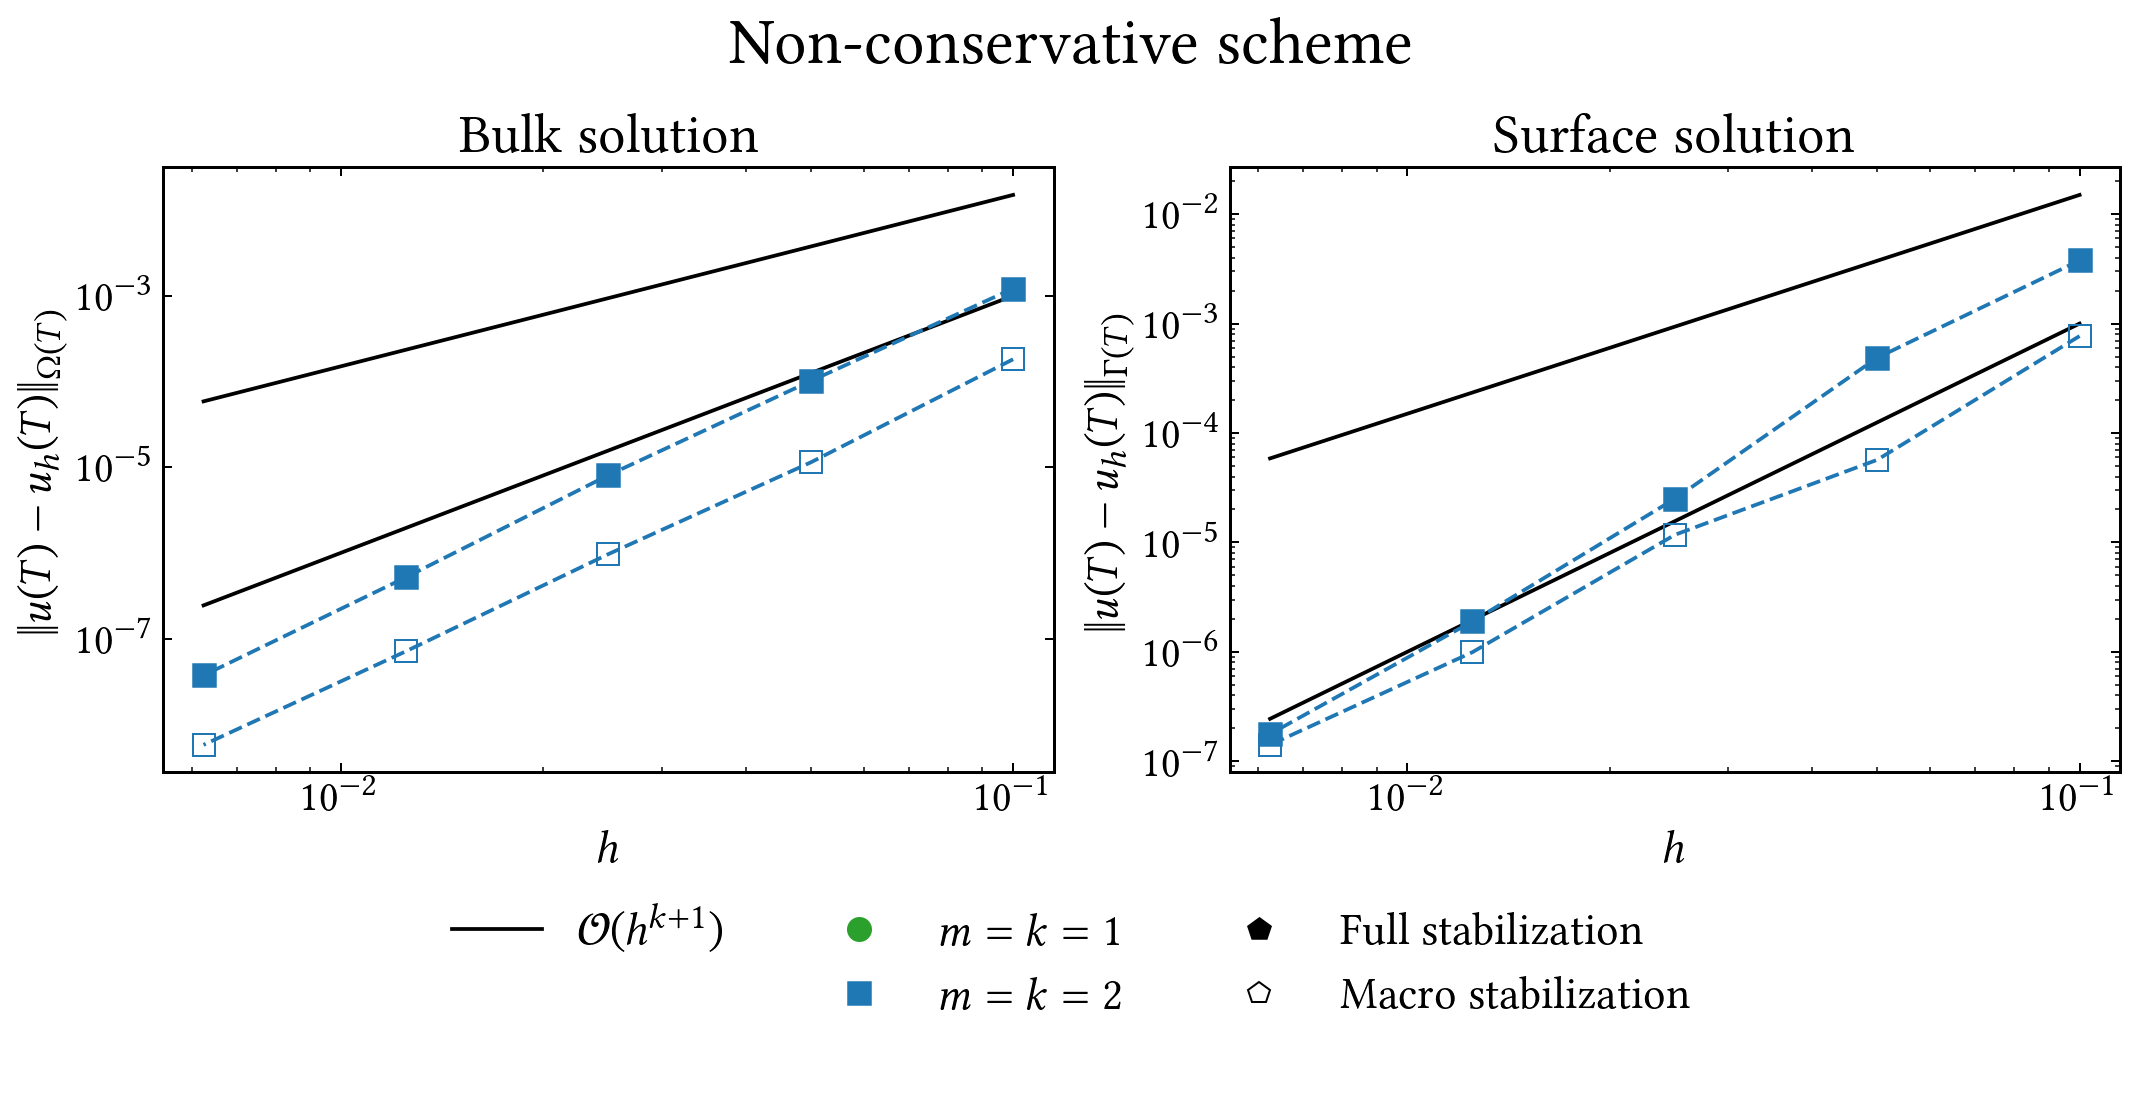

In [24]:
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dt = [0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
nx = [11, 21, 41, 81, 161]

# patch stabilization with all constants = 1 used unless specified else

# N = 3 in space and time, T = 0.1, all tau = 1
error_conservative_P1P1_fullstab_bulk = [0.001436969218754917, 0.0003399753870937176, 7.92832208173803e-05, 1.969957634890988e-05, 4.865959457859743e-06]
error_conservative_P1P1_fullstab_surf = [0.005437962568392307, 0.001513744902534839, 0.0003589608567059314, 8.771256387250205e-05, 2.32766529030055e-05]
error_conservative_P1P1_fullstab_bulk_T = [0.0002838401528515564, 8.063974320052675e-05, 1.882372630044429e-05, 4.527557910652576e-06, 1.096794611090648e-06]
error_conservative_P1P1_fullstab_surf_T = [0.001358475625391823, 0.0003726886061561994, 0.0001039409721562482, 2.775250200105002e-05, 7.312584261336118e-06]

# error_conservative_P1P1_macro_bulk = 
# error_conservative_P1P1_macro_surf = 
# error_conservative_P1P1_macro_bulk_T =
# error_conservative_P1P1_macro_surf_T =

# error_classical_P1P1_fullstab_bulk = 
# error_classical_P1P1_fullstab_surf = 
# error_classical_P1P1_fullstab_bulk_T =
# error_classical_P1P1_fullstab_surf_T =

# error_classical_P1P1_macro_bulk = 
# error_classical_P1P1_macro_surf = 
# error_classical_P1P1_macro_bulk_T =
# error_classical_P1P1_macro_surf_T =

# P2P2

# N = 5 in space and time, T = 0.1, all tau = 1
error_conservative_P2P2_fullstab_bulk = [0.001210834005729514, 0.000101088405474868, 8.052928636566812e-06, 5.1997870091374e-07, 3.753719953668397e-08]
error_conservative_P2P2_fullstab_surf = [0.003776275788171884, 0.0004902577527934357, 2.503973534272408e-05, 1.903724902004774e-06, 3.55277406924598e-06]
error_conservative_P2P2_fullstab_bulk_T = [0.0002518185285482085, 2.586438606685788e-05, 2.381449440850025e-06, 1.674349387534208e-07, 1.343318260636861e-08]
error_conservative_P2P2_fullstab_surf_T = [0.001253537661264468, 0.0001371111510070378, 1.040133119533114e-05, 1.118788192283314e-06, 4.61332201060423e-07]

# N = 5 in space and time, T = 0.1, tau_P_bulk = 1, tau_F_surf = 20, tau_G = 1
error_conservative_P2P2_fullstab_bulk = [0.004096832573510989, 0.0005626814908448254, 5.731488716184854e-05, 4.595659807146872e-06, 3.106963098728499e-07]
error_conservative_P2P2_fullstab_surf = [0.01392994251406617, 0.003008643856275742, 0.0002626298946059558, 2.960410546278773e-05, 2.347797374432464e-06]
error_conservative_P2P2_fullstab_bulk_T = [0.0008535486545304333, 0.0001363691175070067, 1.595409214302208e-05, 1.293114847926809e-06, 8.380698413923026e-08]
error_conservative_P2P2_fullstab_surf_T = [0.004341554799821395, 0.0008808410885037697, 0.0001167351426207192, 1.055997262835599e-05, 7.937565027982795e-07]

# N = 5 in space, N=9 time, T = 0.1, all tau = 1
error_conservative_P2P2_fullstab_bulk =  [0.001211541939324674, 0.00010110257047809, 8.05327646537645e-06, 5.193590082568415e-07, 3.728012311952351e-08]
error_conservative_P2P2_fullstab_surf = [0.003776151099678099, 0.0004866707742616463, 2.502261839998961e-05, 1.898620534922954e-06, 1.190624032760868e-06]
error_conservative_P2P2_fullstab_bulk_T = [0.0002520366700931237, 2.585234186804958e-05, 2.382395880819938e-06, 1.670344148825744e-07, 1.301112192089659e-08]
error_conservative_P2P2_fullstab_surf_T = [0.001255079079408932, 0.0001370397320262611, 1.0326431713202e-05, 7.532447119303642e-07, 1.557439140761728e-07]

#! terminal
# N = 5 in space, N=20 time, T = 0.1, all tau = 1
# error_conservative_P2P2_fullstab_bulk = 
# error_conservative_P2P2_fullstab_surf = 
# error_conservative_P2P2_fullstab_bulk_T =
# error_conservative_P2P2_fullstab_surf_T =



# N = 5 in space and time, delta_bulk = 0.7, delta_surf = 0.3, tau_F_bulk = 1, tau_F_surf = 20, tau_G = 1
error_conservative_P2P2_macro_bulk = [0.0002085225228171761, 1.680567753765947e-05, 1.643497427498349e-06, 1.100735476749201e-07, 1.007405115889996e-08]
error_conservative_P2P2_macro_surf = [0.0009387799213507795, 7.693474897435516e-05, 2.70270826931299e-05, 1.215968003196288e-06, 4.959804669284683e-07]
error_conservative_P2P2_macro_bulk_T = [4.678710146452595e-05, 6.172081991999917e-06, 5.176943699451503e-07, 4.017089854662172e-08, 3.591068457409512e-09]
error_conservative_P2P2_macro_surf_T = [0.000275947344393286, 5.504343588252375e-05, 7.529385344537956e-06, 1.046668637310136e-06, 1.867573134130052e-07]
ec_conservative_P2P2_macro = [2.905974072486828e-13, 2.092076512028029e-13, 7.001066393286237e-13, 1.085000145284454e-12, 1.321650427987819e-11]

# N = 5 in space and N=7 in time, delta_bulk = 0.7, delta_surf = 0.5, tau_F_bulk = 1, tau_F_surf = 20, tau_G = 1
error_conservative_P2P2_macro_bulk = [0.0003461969464354394, 2.825734041056828e-05, 4.125827125514908e-06, 2.655964286406406e-07, 1.870672027826178e-08]
error_conservative_P2P2_macro_surf = [0.001345174314781386, 0.0001379553684278884, 6.590846444407315e-05, 3.719452342287482e-06, 3.947444121918242e-07]
error_conservative_P2P2_macro_bulk_T = [8.607520155060187e-05, 1.033966852996881e-05, 1.048503422842977e-06, 7.819357589816057e-08, 5.841403103110674e-09]
error_conservative_P2P2_macro_surf_T = [0.0005650437537829193, 8.002611635782524e-05, 1.252207298009651e-05, 1.562977891138562e-06, 2.176964683010915e-07]
ec_conservative_P2P2_macro = [1.845745778439323e-14, 4.190085778343899e-13, 1.520561454526614e-12, 2.674312160610981e-12, 1.973865515481066e-11]

# N = 5 in space and N=9 in time, delta_bulk = 0.7, delta_surf = 0.5, tau_F_bulk = 1, tau_F_surf = 10, tau_G = 1
error_conservative_P2P2_macro_bulk = [0.0002980703085713136, 2.318479592169907e-05, 3.001792866048952e-06, 1.929895150165745e-07, 1.401705894971565e-08]
error_conservative_P2P2_macro_surf = [0.001198285363873376, 0.0001173573993530301, 4.488335376206264e-05, 2.566355095849899e-06, 4.091838785149332e-07]
error_conservative_P2P2_macro_bulk_T = [7.348549513124959e-05, 8.147626121280707e-06, 7.925778896893056e-07, 5.799505230386161e-08, 4.373650576394886e-09]
error_conservative_P2P2_macro_surf_T = [0.0004732693683572678, 6.237327635500868e-05, 9.527614135297267e-06, 1.169696203728147e-06, 1.649678209117105e-07]
ec_conservative_P2P2_macro = [8.666678485980128e-15, 2.173088098356146e-13, 1.367492924453373e-12, 4.854054658220974e-12, 4.996746072460923e-12]


# N = 5 in space and time, T = 0.1, dt=h/4, span and vector, std::max(std::abs), all tau = 1, delta_B = 0.3, delta_S = 0.5
error_classical_P2P2_fullstab_bulk = [0.001211226194325075, 0.0001010958853485565, 8.053152470355415e-06, 5.192053737530461e-07, 3.724401938774275e-08]
error_classical_P2P2_fullstab_surf = [0.003775815671284734, 0.0004870436761749887, 2.501619324660985e-05, 1.89718134510535e-06, 1.771736716903169e-07]
error_classical_P2P2_fullstab_bulk_T = [0.0002519084126799232, 2.584631191388995e-05, 2.382518444329721e-06, 1.670179215081319e-07, 1.30015265146191e-08]
error_classical_P2P2_fullstab_surf_T = [0.001254145281582244, 0.0001369921465559253, 1.032403741192638e-05, 7.01571010457415e-07, 5.909536970223756e-08]

# delta_bulk = 0.7, delta_surf = 0.3, all tau = 1
error_classical_P2P2_macro_bulk = [0.0001416377845968235, 8.460594380204152e-06, 6.219134862401275e-07, 5.2679604013832e-08, 4.991273172625344e-09]
error_classical_P2P2_macro_surf = [0.0006675722714381102, 4.455326626598843e-05, 7.562348061295648e-06, 6.03164879444705e-07, 1.322418089742306e-07]
error_classical_P2P2_macro_bulk_T = [3.154095660032017e-05, 2.766941529359621e-06, 2.09884321637897e-07, 1.816725247563821e-08, 1.741597963854045e-09]
error_classical_P2P2_macro_surf_T = [0.0001759662408641955, 1.825426286917559e-05, 2.528692014242728e-06, 3.29710946204454e-07, 4.565567041257742e-08]

# delta_bulk = 0.7, delta_surf = 0.5, all tau = 1
error_classical_P2P2_macro_bulk = [0.0001814213385502012, 1.13643111313195e-05, 9.671683923594765e-07, 7.113533421961794e-08, 5.768268757081118e-09]
error_classical_P2P2_macro_surf = [0.000769246220831641, 5.684642506170021e-05, 1.172449058213861e-05, 9.924461658931292e-07, 1.412785340017906e-07]
error_classical_P2P2_macro_bulk_T = [4.370830195806856e-05, 3.543045032135379e-06, 2.87683087938837e-07, 2.235234537309247e-08, 1.924132542897319e-09]
error_classical_P2P2_macro_surf_T = [0.0002570562301261455, 2.475371775208027e-05, 3.360147801165863e-06, 4.07080383829589e-07, 5.111578811685861e-08]



print(convergence_rate(error_conservative_P2P2_macro_surf_T, h))



fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Conservative scheme", fontsize=26)

#! L2 error
axs[0,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[0,0].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#axs[0,0].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  
axs[0,0].loglog(h, error_conservative_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle=":", color="C2")
axs[0,0].loglog(h, error_conservative_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle=":", color="C0")
#axs[0,0].loglog(h, error_conservative_P3P3_fullstab_bulk, marker='^', markersize=9, linestyle=":", color="C3")
#axs[0,0].loglog(h, error_conservative_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
axs[0,0].loglog(h, error_conservative_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
#axs[0,0].loglog(h, error_conservative_P3P3_macro_bulk, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[0,0].set_xlabel(r"$h$", fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=17)
axs[0,0].set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$", fontsize=18)
axs[0,0].set_title(r"Bulk solution")


axs[0,1].loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
axs[0,1].loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
#axs[0,1].loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")
axs[0,1].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[0,1].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

axs[0,1].loglog(h, error_conservative_P1P1_fullstab_surf, marker='o', markersize=9, linestyle=":", color="C2")
axs[0,1].loglog(h, error_conservative_P2P2_fullstab_surf, marker='s', markersize=9, linestyle=":", color="C0")
#axs[0,1].loglog(h, error_conservative_P3P3_fullstab_surf, marker='^', markersize=9, linestyle=":", color="C3")
#axs[0,1].loglog(h, error_conservative_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
axs[0,1].loglog(h, error_conservative_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
#axs[0,1].loglog(h, error_conservative_P3P3_macro_surf, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[0,1].set_title(r"Surface solution")
axs[0,1].set_xlabel(r"$h$", fontsize=18)
axs[0,1].tick_params(axis='both', which='major', labelsize=17)
axs[0,1].set_ylabel(r"$\|u(T)-u_h(T)\|_{\Gamma(T)}$", fontsize=18)

#! L2(0,T) error
axs[1,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[1,0].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

axs[1,0].loglog(h, error_conservative_P1P1_fullstab_bulk_T, marker='o', markersize=9, linestyle=":", color="C2")
axs[1,0].loglog(h, error_conservative_P2P2_fullstab_bulk_T, marker='s', markersize=9, linestyle=":", color="C0")
# axs[1,0].loglog(h, error_conservative_P3P3_fullstab_bulk_T, marker='^', markersize=9, linestyle=":", color="C3")
# axs[1,0].loglog(h, error_conservative_P1P1_macro_bulk_T, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
axs[1,0].loglog(h, error_conservative_P2P2_macro_bulk_T, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
# axs[1,0].loglog(h, error_conservative_P3P3_macro_bulk_T, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[1,0].set_xlabel(r"$h$", fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=17)
axs[1,0].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Omega(t)), 0, T)}$")
axs[1,0].set_title(r"Bulk solution")

axs[1,1].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[1,1].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

axs[1,1].loglog(h, error_conservative_P1P1_fullstab_surf_T, marker='o', markersize=9, linestyle=":", color="C2")
axs[1,1].loglog(h, error_conservative_P2P2_fullstab_surf_T, marker='s', markersize=9, linestyle=":", color="C0")
# axs[1,1].loglog(h, error_conservative_P3P3_fullstab_surf_T, marker='^', markersize=9, linestyle=":", color="C3")
# axs[1,1].loglog(h, error_conservative_P1P1_macro_surf_T, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
axs[1,1].loglog(h, error_conservative_P2P2_macro_surf_T, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
# axs[1,1].loglog(h, error_conservative_P3P3_macro_surf_T, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[1,1].set_title(r"Surface solution")
axs[1,1].set_xlabel(r"$h$", fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=17)
axs[1,1].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Gamma(t)), 0, T)}$")

handles, labels = [(a + b) for a, b in zip(axs[0,0].get_legend_handles_labels(), axs[0,1].get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()


# Non conservative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Non-conservative scheme", fontsize=26)
#ax1.loglog(h, 0.5e-2*np.power(h, 1), linestyle="-", color="black")  
ax1.loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#ax1.loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  

#ax1.loglog(h, error_classical_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle="--", color="C2")
ax1.loglog(h, error_classical_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle="--", color="C0")
#ax1.loglog(h, error_classical_P3P3_fullstab_bulk, marker='^', markersize=9, linestyle="--", color="C3")
#ax1.loglog(h, error_classical_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
ax1.loglog(h, error_classical_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")
#ax1.loglog(h, error_classical_P3P3_macro_bulk, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3")

ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$", fontsize=18)
ax1.set_title(r"Bulk solution")


ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
#ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#ax2.loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black") 

#ax2.loglog(h, error_classical_P1P1_fullstab_surf, marker='o', markersize=9, linestyle="--", color="C2")
ax2.loglog(h, error_classical_P2P2_fullstab_surf, marker='s', markersize=9, linestyle="--", color="C0")
#ax2.loglog(h, error_classical_P3P3_fullstab_surf, marker='^', markersize=9, linestyle="--", color="C3")
#ax2.loglog(h, error_classical_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
ax2.loglog(h, error_classical_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")
#ax2.loglog(h, error_classical_P3P3_macro_surf, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3")

ax2.set_title(r"Surface solution")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Gamma(T)}$", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()



### Fig 2: L2 error vs h

[2.9236616  2.71074115 3.02598111 2.82587734]


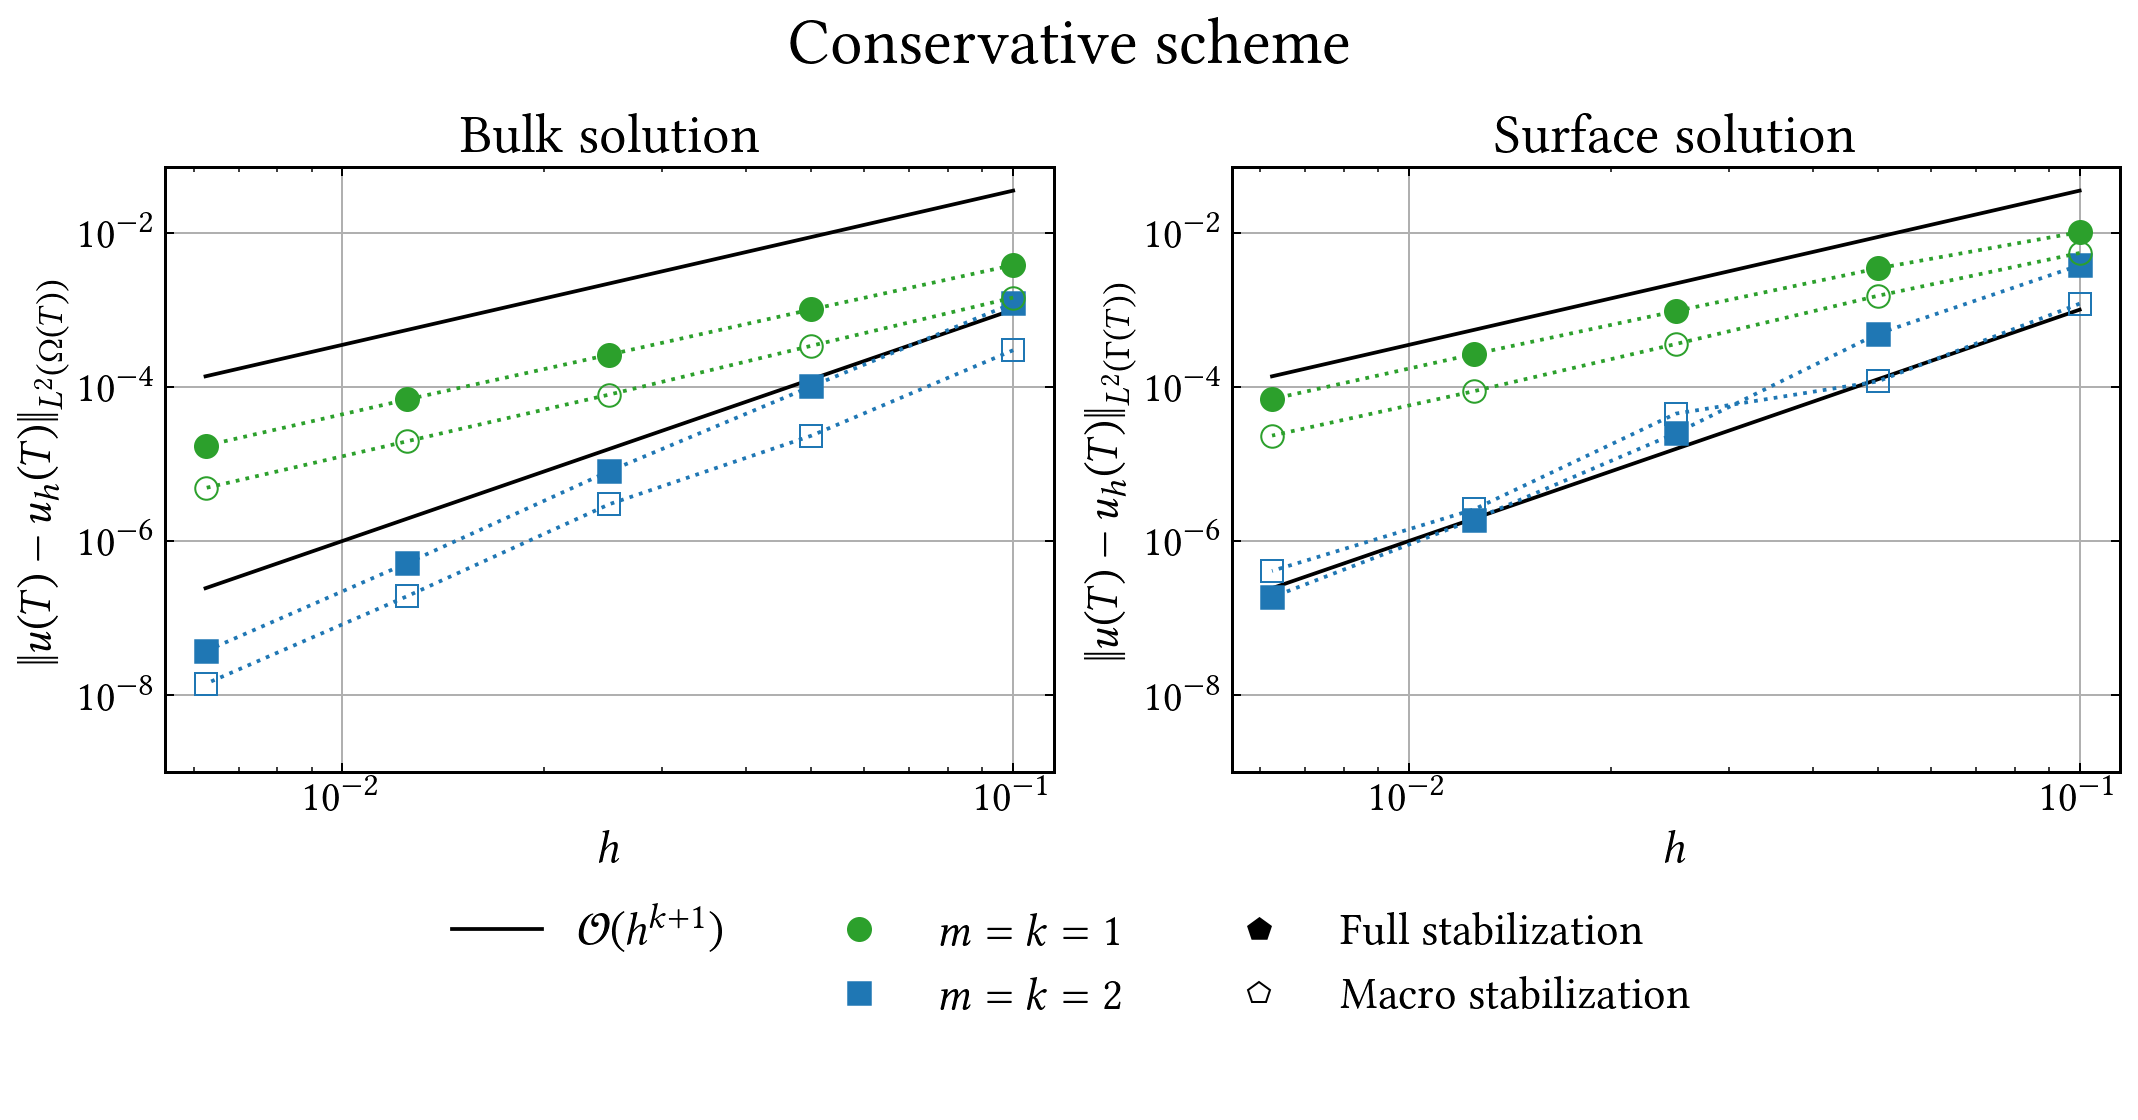

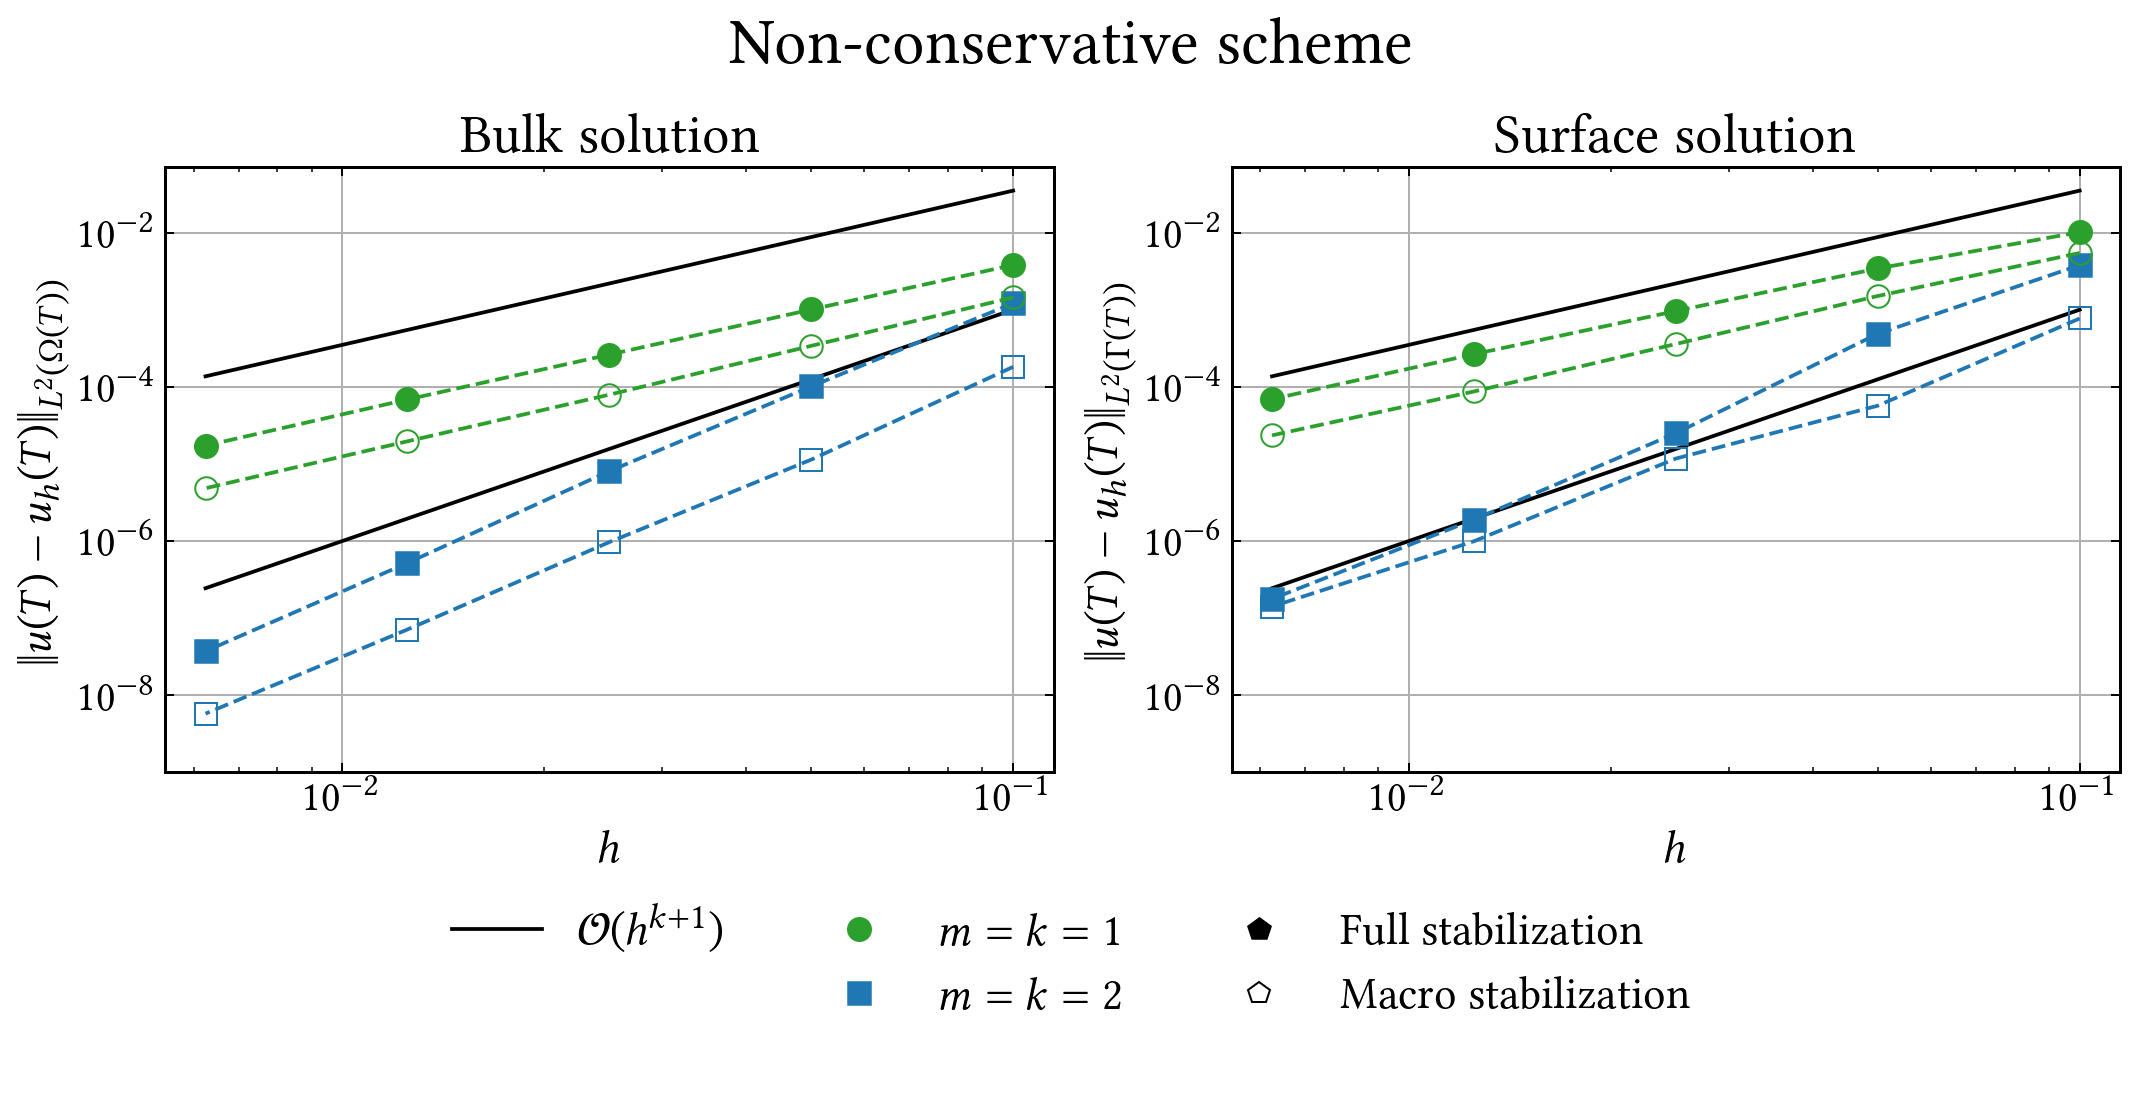

In [66]:
# patch

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dt = [0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
nx = [11, 21, 41, 81, 161]

# N = 3 in space and time, T = 0.1, all tau = 1
error_conservative_P1P1_fullstab_bulk = [0.003794242685339072, 0.00100581505675375, 0.0002614174193699142, 6.856548726886639e-05, 1.725473304064097e-05]
error_conservative_P1P1_fullstab_surf = [0.01013970112221674, 0.003436419380462527, 0.0009586265461702076, 0.0002654962889667869, 6.924974719875747e-05]
error_conservative_P1P1_fullstab_bulk_T = [0.0007666007184390229, 0.0002237313136506221, 6.301836695765704e-05, 1.644851674203748e-05, 3.976371152514845e-06]
error_conservative_P1P1_fullstab_surf_T = [0.003254550867673094, 0.0009324067308314931, 0.0002900082296585309, 7.964261135007661e-05, 2.055309860620557e-05]
ec_conservative_P1P1_fullstab = [3.597816489175898e-15, 8.930356454328603e-15, 3.522182545623309e-14, 1.210490041536616e-13, 3.559895433991045e-13]

# N = 3 in space and time, T = 0.1, all tau = 1
error_conservative_P1P1_macro_bulk = [0.001436969218754917, 0.0003399753870937176, 7.92832208173803e-05, 1.969957634890988e-05, 4.865959457859743e-06]
error_conservative_P1P1_macro_surf = [0.005437962568392307, 0.001513744902534839, 0.0003589608567059314, 8.771256387250205e-05, 2.32766529030055e-05]
error_conservative_P1P1_macro_bulk_T = [0.0002838401528515564, 8.063974320052675e-05, 1.882372630044429e-05, 4.527557910652576e-06, 1.096794611090648e-06]
error_conservative_P1P1_macro_surf_T = [0.001358475625391823, 0.0003726886061561994, 0.0001039409721562482, 2.775250200105002e-05, 7.312584261336118e-06]

error_classical_P1P1_fullstab_bulk = [0.003802436676705615, 0.001005671831186029, 0.0002613882444263279, 6.845860569659882e-05, 1.724119183729667e-05]
error_classical_P1P1_fullstab_surf = [0.01013849861053738, 0.003424905864819478, 0.000959191686839215, 0.0002649367999375272, 6.905751153021023e-05]
error_classical_P1P1_fullstab_bulk_T = [0.0007676148270429593, 0.0002237452901379673, 6.303211248615822e-05, 1.643545900181697e-05, 3.973853247587038e-06]
error_classical_P1P1_fullstab_surf_T = [0.003258375795554351, 0.0009324827780810826, 0.0002900675411923948, 7.946624680778054e-05, 2.047253273467594e-05]

error_classical_P1P1_macro_bulk = [0.001443600459381525, 0.000339614458027362, 7.90277973793088e-05, 1.96330694597784e-05, 4.831896403571385e-06]
error_classical_P1P1_macro_surf = [0.005442349289625351, 0.001505303300995241, 0.0003588576569046897, 8.691991267427558e-05, 2.344180733156594e-05]
error_classical_P1P1_macro_bulk_T = [0.0002845978417605556, 8.064085863242169e-05, 1.872788086693512e-05, 4.512465753632796e-06, 1.089566334716725e-06]
error_classical_P1P1_macro_surf_T = [0.001360332425124328, 0.0003727390271536834, 0.0001034276473581118, 2.751040766856948e-05, 7.074980037514514e-06]

# P2P2
# N = 5 in space, N=20 time, T = 0.1, all tau = 1
error_conservative_P2P2_fullstab_bulk = [0.001211636796683134, 0.0001011099302152643, 8.053490549467962e-06, 5.192558101385141e-07, 3.724660345811779e-08]
error_conservative_P2P2_fullstab_surf = [0.003777078300388976, 0.0004870190125456646, 2.502109327753615e-05, 1.898273673018491e-06, 1.864629018173576e-07]
error_conservative_P2P2_fullstab_bulk_T = [0.0002520228775564627, 2.584917848311292e-05, 2.382477285795693e-06, 1.670228738258075e-07, 1.300240182399133e-08]
error_conservative_P2P2_fullstab_surf_T = [0.001255092822926086, 0.0001370150650519005, 1.032627242732558e-05, 7.035113905522668e-07, 7.127863449023679e-08]


# N = 5 in space and N=9 in time, delta_bulk = 0.7, delta_surf = 0.5, tau_F_bulk = 1, tau_F_surf = 10, tau_G = 1
error_conservative_P2P2_macro_bulk = [0.0002980703085713136, 2.318479592169907e-05, 3.001792866048952e-06, 1.929895150165745e-07, 1.401705894971565e-08]
error_conservative_P2P2_macro_surf = [0.001198285363873376, 0.0001173573993530301, 4.488335376206264e-05, 2.566355095849899e-06, 4.091838785149332e-07]
error_conservative_P2P2_macro_bulk_T = [7.348549513124959e-05, 8.147626121280707e-06, 7.925778896893056e-07, 5.799505230386161e-08, 4.373650576394886e-09]
error_conservative_P2P2_macro_surf_T = [0.0004732693683572678, 6.237327635500868e-05, 9.527614135297267e-06, 1.169696203728147e-06, 1.649678209117105e-07]
ec_conservative_P2P2_macro = [8.666678485980128e-15, 2.173088098356146e-13, 1.367492924453373e-12, 4.854054658220974e-12, 4.996746072460923e-12]


# N = 5 in space and time, T = 0.1, dt=h/4
error_classical_P2P2_fullstab_bulk = [0.001211226194325075, 0.0001010958853485565, 8.053152470355415e-06, 5.192053737530461e-07, 3.724401938774275e-08]
error_classical_P2P2_fullstab_surf = [0.003775815671284734, 0.0004870436761749887, 2.501619324660985e-05, 1.89718134510535e-06, 1.771736716903169e-07]
error_classical_P2P2_fullstab_bulk_T = [0.0002519084126799232, 2.584631191388995e-05, 2.382518444329721e-06, 1.670179215081319e-07, 1.30015265146191e-08]
error_classical_P2P2_fullstab_surf_T = [0.001254145281582244, 0.0001369921465559253, 1.032403741192638e-05, 7.01571010457415e-07, 5.909536970223756e-08]

# delta_bulk = 0.7, delta_surf = 0.5, all tau = 1
error_classical_P2P2_macro_bulk = [0.0001814213385502012, 1.13643111313195e-05, 9.671683923594765e-07, 7.113533421961794e-08, 5.768268757081118e-09]
error_classical_P2P2_macro_surf = [0.000769246220831641, 5.684642506170021e-05, 1.172449058213861e-05, 9.924461658931292e-07, 1.412785340017906e-07]
error_classical_P2P2_macro_bulk_T = [4.370830195806856e-05, 3.543045032135379e-06, 2.87683087938837e-07, 2.235234537309247e-08, 1.924132542897319e-09]
error_classical_P2P2_macro_surf_T = [0.0002570562301261455, 2.475371775208027e-05, 3.360147801165863e-06, 4.07080383829589e-07, 5.111578811685861e-08]


print(convergence_rate(error_conservative_P2P2_macro_surf_T, h))

# Conservative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Conservative scheme", fontsize=26)

ax1.loglog(h, 3.5*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 


ax1.loglog(h, error_conservative_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle=":", color="C2")
ax1.loglog(h, error_conservative_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle=":", color="C0")
ax1.loglog(h, error_conservative_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
ax1.loglog(h, error_conservative_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")

ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$", fontsize=18)
ax1.set_title(r"Bulk solution")
ax1.set_ylim(1e-9, 7.e-2)
ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax1.grid()

ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 3.5*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

ax2.loglog(h, error_conservative_P1P1_fullstab_surf, marker='o', markersize=9, linestyle=":", color="C2")
ax2.loglog(h, error_conservative_P2P2_fullstab_surf, marker='s', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, error_conservative_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
ax2.loglog(h, error_conservative_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")


ax2.set_title(r"Surface solution")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Gamma(T))}$", fontsize=18)
ax2.set_ylim(1e-9, 7.e-2)
ax2.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax2.grid()
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)


plt.tight_layout()
fig.savefig("coupled_conservative.pdf")
plt.show()



# Non conservative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Non-conservative scheme", fontsize=26)
ax1.loglog(h, 3.5*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

ax1.loglog(h, error_classical_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle="--", color="C2")
ax1.loglog(h, error_classical_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle="--", color="C0")
ax1.loglog(h, error_classical_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
ax1.loglog(h, error_classical_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")

ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$", fontsize=18)
ax1.set_ylim(1e-9, 7.e-2)
ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax1.set_title(r"Bulk solution")
ax1.grid()


ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 3.5*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 

ax2.loglog(h, error_classical_P1P1_fullstab_surf, marker='o', markersize=9, linestyle="--", color="C2")
ax2.loglog(h, error_classical_P2P2_fullstab_surf, marker='s', markersize=9, linestyle="--", color="C0")
ax2.loglog(h, error_classical_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
ax2.loglog(h, error_classical_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")

ax2.set_title(r"Surface solution")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Gamma(T))}$", fontsize=18)
ax2.set_ylim(1e-9, 7.e-2)
ax2.set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax2.grid()
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

plt.tight_layout()
fig.savefig("coupled_non_conservative.pdf")
plt.show()



### Fig 3: Conservation error vs t

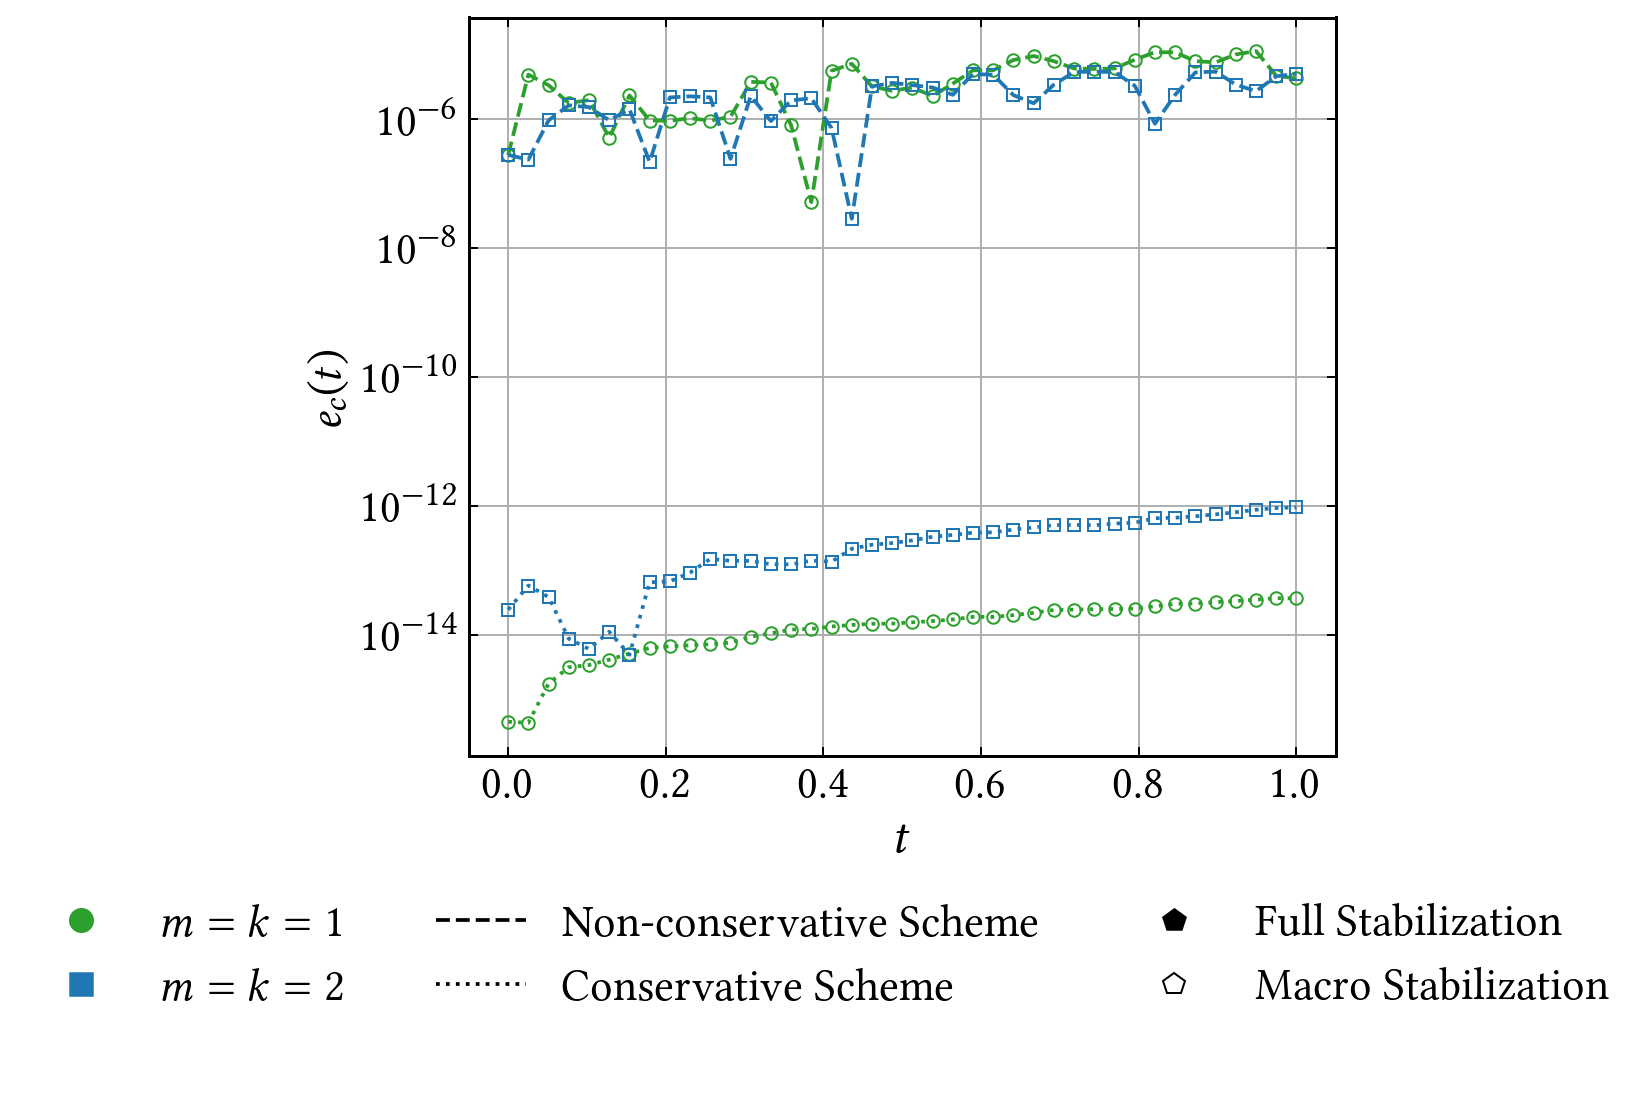

In [2]:
### Conservation error
# h=0.1, dt=h/4, T=1, tau = 1, delta_bulk = 0.7, delta_surf = 0.5

# N=3 in time and 3 in space
ec_conservative_macro_P1P1 = [4.45824e-16, 4.30211e-16, 1.7486e-15, 3.13638e-15, 3.38618e-15, 4.10089e-15, 5.10009e-15, 6.23286e-15, 6.62057e-15, 6.85736e-15, 7.11931e-15, 7.54605e-15, 9.312e-15, 1.05367e-14, 1.20355e-14, 1.232e-14, 1.34129e-14, 1.41692e-14, 1.47989e-14, 1.48802e-14, 1.5583e-14, 1.63237e-14, 1.72501e-14, 1.89536e-14, 1.89015e-14, 2.01367e-14, 2.18749e-14, 2.42584e-14, 2.45507e-14, 2.48837e-14, 2.51014e-14, 2.54484e-14, 2.76515e-14, 3.02085e-14, 3.05068e-14, 3.21479e-14, 3.33483e-14, 3.50796e-14, 3.69375e-14, 3.67538e-14]
ec_classical_macro_P1P1 = [2.78419e-07, 4.95789e-06, 3.38653e-06, 1.78965e-06, 1.99496e-06, 5.20061e-07, 2.35268e-06, 9.6032e-07, 9.52183e-07, 1.04227e-06, 9.57309e-07, 1.0936e-06, 3.8249e-06, 3.72643e-06, 8.07357e-07, 5.19077e-08, 5.67376e-06, 7.29899e-06, 3.24458e-06, 2.77857e-06, 3.1148e-06, 2.30305e-06, 3.59036e-06, 5.77648e-06, 5.78921e-06, 8.34497e-06, 9.63109e-06, 8.01469e-06, 6.16214e-06, 6.07831e-06, 6.16582e-06, 8.43196e-06, 1.1058e-05, 1.09633e-05, 8.02465e-06, 7.67313e-06, 1.01923e-05, 1.14856e-05, 4.74907e-06, 4.33254e-06]


# N=9 in time and 5 in space, tau_F_surf = 10
ec_conservative_macro_P2P2 = [2.44683e-14, 5.8089e-14, 3.84172e-14, 8.66668e-15, 6.00214e-15, 1.10988e-14, 4.88845e-15, 6.51354e-14, 6.74044e-14, 9.19907e-14, 1.50187e-13, 1.40631e-13, 1.39694e-13, 1.24067e-13, 1.23696e-13, 1.41848e-13, 1.35898e-13, 2.16244e-13, 2.49512e-13, 2.65191e-13, 2.91486e-13, 3.31367e-13, 3.54446e-13, 3.84019e-13, 3.87974e-13, 4.29955e-13, 4.62057e-13, 5.03713e-13, 5.0699e-13, 5.00599e-13, 5.31988e-13, 5.48023e-13, 6.42937e-13, 6.55375e-13, 6.8931e-13, 7.38978e-13, 7.98174e-13, 8.71872e-13, 9.27756e-13, 9.47771e-13]

# N=5 in time and 5 in space, tau_F_surf = 1
ec_classical_macro_P2P2 = [2.81169e-07, 2.3662e-07, 9.6544e-07, 1.65154e-06, 1.54601e-06, 9.68721e-07, 1.4356e-06, 2.18778e-07, 2.19163e-06, 2.27945e-06, 2.19063e-06, 2.43534e-07, 2.30737e-06, 9.41886e-07, 1.96954e-06, 2.12937e-06, 7.3224e-07, 2.86766e-08, 3.24701e-06, 3.68594e-06, 3.40041e-06, 3.12371e-06, 2.40564e-06, 5.0636e-06, 4.9319e-06, 2.37603e-06, 1.77943e-06, 3.46117e-06, 5.4289e-06, 5.51648e-06, 5.42796e-06, 3.32876e-06, 8.55308e-07, 2.41078e-06, 5.35698e-06, 5.52075e-06, 3.46739e-06, 2.73846e-06, 4.66669e-06, 5.11119e-06]

# # N=9 in time and 9 in space
# ec_conservative_macro_P3P3 =
# ec_classical_macro_P3P3 = 

times = np.linspace(0,1,40)
#times = [0, 0.0333333, 0.0666667, 0.1, 0.133333, 0.166667, 0.2, 0.233333, 0.266667, 0.3, 0.333333, 0.366667, 0.4, 0.433333, 0.466667, 0.5, 0.533333, 0.566667, 0.6, 0.633333, 0.666667, 0.7, 0.733333, 0.766667, 0.8, 0.833333, 0.866667, 0.9, 0.933333, 0.966667]

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.semilogy([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax.semilogy([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
ax.semilogy([],[], linestyle="None", label=" ")
#ax.semilogy([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
ax.semilogy([],[], linestyle="--", color="black",label=r"Non-conservative Scheme")
ax.semilogy([],[], linestyle=":", color="black", label=r"Conservative Scheme")
ax.semilogy([],[], linestyle="None", label=" ")
ax.semilogy([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full Stabilization")
ax.semilogy([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro Stabilization")
ax.semilogy(times, ec_conservative_macro_P1P1, marker='o', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax.semilogy(times, ec_classical_macro_P1P1,   marker='o', markersize=5,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax.semilogy(times, ec_conservative_macro_P2P2, marker='s', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax.semilogy(times, ec_classical_macro_P2P2,   marker='s', markersize=5,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0")
#ax.semilogy(times, ec_conservative_macro_P3P3, marker='^', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
#ax.semilogy(times, ec_classical_macro_P3P3,   marker='^', markersize=5,linestyle="--",  markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax.semilogy([],[], linestyle="None", label=" ")
ax.tick_params(axis='both', which='major', labelsize=18)

handles, labels = [a for a in ax.get_legend_handles_labels()]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
#ax7.legend(handles=[Rey,III,circle],prop={'size': 18},frameon=False)
#ax7.legend(prop={'size': 18},frameon=False)
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"$e_c(t)$", fontsize=18)
#ax7.set_title(r"Classical scheme")
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("coupled_conservation_vs_t.pdf")